In [1]:
import pandas as pd 
from bs4 import BeautifulSoup
import requests
import numpy as np
import scipy.stats as stats
from sklearn.metrics import r2_score, accuracy_score
import matplotlib.pyplot as plt 
import seaborn as sns
import re
import scipy.stats as stats

# Importing data

In [2]:

# I can vary the year from 2015 onwards

# For example: 
## year = 2024
## start_url = "https://www.exchange-rates.org/exchange-rate-history/idr-gbp-{year}"
## THis way, I can automate the process
## I will create a class that can summarise my pipeline and then use this function for each year 

start_url = "https://www.exchange-rates.org/exchange-rate-history/idr-gbp"

url2 = "https://www.exchange-rates.org/exchange-rate-history/idr-gbp"


data = requests.get(start_url) 

soup = BeautifulSoup(data.text)



In [3]:
years = soup.select('ul.rates-by-year li')
year = [] 
for i in years: 
    print (i.text)
    year.append(int(i.text))
max_year = max(year) 
min_year = min(year)


2024


2023


2022


2021


2020


2019


2018


2017


2016


2015



In [4]:
start_url = "https://www.exchange-rates.org/exchange-rate-history/idr-gbp"


# Turn into numbers 
html = requests.get(start_url)
soup = BeautifulSoup(html.text)
# I need to assign this to different years 
years = soup.select('ul.rates-by-year li')
year = [] 
for i in years: 
    year.append(int(i.text))
max_year = max(year) 
min_year = min(year)

print (f"{min_year} :: {max_year}")

2015 :: 2024


## Data Collection for each Year

I can sort through each year and find the maximum value 

In [5]:
# I need to find out the current year and match it to the records (or I could just use the current year)

In [6]:
import requests

# Test 

## I will need to put this in a function

In [7]:



start_url = f"https://www.exchange-rates.org/exchange-rate-history/idr-gbp-2024"

# Turn into numbers 
html = requests.get(start_url)
soup = BeautifulSoup(html.text)
# I need to assign this to different years 


values_html = soup.select("table.history-rates-data tbody tr td")
row_values_html = soup.select('table.history-rates-data tbody tr td')
column_1 = soup.select("table thead tr th.ltr-bidi-fix")

#############################################
columns = [i.text for i in column_1]
values = [i.text for i in values_html]


## I will need to parse through this...
row_values = [i.get_text(separator=" ", strip=True) for i in row_values_html]


## collecting the table for historical data
## Making the dataframe 

## I need to use the .get_text(seperator=" ", strip=True)

df = pd.DataFrame(row_values)

## Odd numbers shows the exchange rate 
## Even numbers show the date 


exchange = [] 
date = [] 

for i in df.index: 
    
    if i % 2 == 0: 

        date.append(df.iloc[i].values[0])
        
    else: 

        exchange.append(df.iloc[i].values[0])
        
new_df = pd.DataFrame({
    "date": date, 
    "exchange_rate": exchange
})

## Dropping the last row 

new_df.drop(new_df.tail(1).index, inplace=True)

## Removing the square brackets 


In [8]:
years = soup.select('ul.rates-by-year li')
year = [] 
for i in years: 
    print (i.text)
    year.append(int(i.text))
    
    


2024


2023


2022


2021


2020


2019


2018


2017


2016


2015



In [9]:
year

[2024, 2023, 2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015]

In [10]:
new_df

,date,exchange_rate
0,"January 1, 2024 2024-1-1",1 IDR = 0.00005104 GBP 1 IDR = 0.00005104 GBP
1,"January 2, 2024 2024-1-2",1 IDR = 0.00005111 GBP 1 IDR = 0.00005111 GBP
2,"January 3, 2024 2024-1-3",1 IDR = 0.00005072 GBP 1 IDR = 0.00005072 GBP
3,"January 4, 2024 2024-1-4",1 IDR = 0.00005081 GBP 1 IDR = 0.00005081 GBP
4,"January 5, 2024 2024-1-5",1 IDR = 0.00005069 GBP 1 IDR = 0.00005069 GBP
...,...,...
177,"August 26, 2024 2024-8-26",1 IDR = 0.00004898 GBP 1 IDR = 0.00004898 GBP
178,"August 27, 2024 2024-8-27",1 IDR = 0.00004872 GBP 1 IDR = 0.00004872 GBP
179,"August 28, 2024 2024-8-28",1 IDR = 0.00004907 GBP 1 IDR = 0.00004907 GBP
180,"August 29, 2024 2024-8-29",1 IDR = 0.00004911 GBP 1 IDR = 0.00004911 GBP


In [11]:



start_url = f"https://www.exchange-rates.org/exchange-rate-history/idr-gbp-2015"

# Turn into numbers 
html = requests.get(start_url)
soup = BeautifulSoup(html.text)
# I need to assign this to different years 


values_html = soup.select("table.history-rates-data tbody tr td")
row_values_html = soup.select('table.history-rates-data tbody tr td')
column_1 = soup.select("table thead tr th.ltr-bidi-fix")

#############################################
columns = [i.text for i in column_1]
values = [i.text for i in values_html]


## I will need to parse through this...
row_values = [i.get_text(separator=" ", strip=True) for i in row_values_html]


## collecting the table for historical data
## Making the dataframe 

## I need to use the .get_text(seperator=" ", strip=True)

df = pd.DataFrame(row_values)

## Odd numbers shows the exchange rate 
## Even numbers show the date 


exchange = [] 
date = [] 

for i in df.index: 
    
    if i % 2 == 0: 

        date.append(df.iloc[i].values[0])
        
    else: 

        exchange.append(df.iloc[i].values[0])
        
new_df = pd.DataFrame({
    "date": date, 
    "exchange_rate": exchange
})

## Dropping the last row 

new_df.drop(new_df.tail(1).index, inplace=True)

## Preproecssing the data




In [12]:
# Function to clean exchange_rate column
def clean_exchange_rate(rate):
    # Split the rate by space and remove duplicates
    parts = rate.split()
    seen = set()
    unique_parts = []
    for part in parts:
        if part not in seen:
            unique_parts.append(part)
            seen.add(part)
    # Join the unique parts back into a single string
    return ' '.join(unique_parts)

# Apply the cleaning function to the exchange_rate column
new_df['exchange_rate'] = new_df['exchange_rate'].apply(clean_exchange_rate)

# Further split and clean the date column if necessary
def clean_date(date):
    parts = date.split()
    # Assuming the first three parts represent the full date in text form
    clean_date = ' '.join(parts[:3])
    return clean_date

new_df['date'] = new_df['date'].apply(clean_date)

# Display the cleaned dataframe
print(new_df)

                  date           exchange_rate
0      January 1, 2015  1 IDR = 0.00005159 GBP
1      January 2, 2015  1 IDR = 0.00005206 GBP
2      January 3, 2015  1 IDR = 0.00005213 GBP
3      January 5, 2015  1 IDR = 0.00005200 GBP
4      January 6, 2015  1 IDR = 0.00005217 GBP
..                 ...                     ...
328  December 27, 2015  1 IDR = 0.00004918 GBP
329  December 28, 2015  1 IDR = 0.00004915 GBP
330  December 29, 2015  1 IDR = 0.00004890 GBP
331  December 30, 2015  1 IDR = 0.00004901 GBP
332  December 31, 2015  1 IDR = 0.00004906 GBP

[333 rows x 2 columns]


In [13]:
new_df.head()

,date,exchange_rate
0,"January 1, 2015",1 IDR = 0.00005159 GBP
1,"January 2, 2015",1 IDR = 0.00005206 GBP
2,"January 3, 2015",1 IDR = 0.00005213 GBP
3,"January 5, 2015",1 IDR = 0.00005200 GBP
4,"January 6, 2015",1 IDR = 0.00005217 GBP


# Function

In [14]:


def collect_data(year):
    start_url = f"https://www.exchange-rates.org/exchange-rate-history/idr-gbp-{year}" 

    # Turn into numbers 
    html = requests.get(start_url)
    soup = BeautifulSoup(html.text)
    # I need to assign this to different years 


    values_html = soup.select("table.history-rates-data tbody tr td")
    row_values_html = soup.select('table.history-rates-data tbody tr td')
    column_1 = soup.select("table thead tr th.ltr-bidi-fix")

    #############################################
    columns = [i.text for i in column_1]
    values = [i.text for i in values_html]


    ## I will need to parse through this...
    row_values = [i.get_text(separator=" ", strip=True) for i in row_values_html]


    ## collecting the table for historical data
    ## Making the dataframe 

    ## I need to use the .get_text(seperator=" ", strip=True)

    df = pd.DataFrame(row_values)

    ## Odd numbers shows the exchange rate 
    ## Even numbers show the date 


    exchange = [] 
    date = [] 

    for i in df.index: 
        
        if i % 2 == 0: 

            date.append(df.iloc[i].values[0])
            
        else: 

            exchange.append(df.iloc[i].values[0])
            
    new_df = pd.DataFrame({
        "date": date, 
        "exchange_rate": exchange
    })

    ## Dropping the last row 

    new_df.drop(new_df.tail(1).index, inplace=True)

    ## Removing the square brackets 
    # Function to clean exchange_rate column
    def clean_exchange_rate(rate):
        # Split the rate by space and remove duplicates
        parts = rate.split()
        seen = set()
        unique_parts = []
        for part in parts:
            if part not in seen:
                unique_parts.append(part)
                seen.add(part)
        # Join the unique parts back into a single string
        return ' '.join(unique_parts)

    # Apply the cleaning function to the exchange_rate column
    new_df['exchange_rate'] = new_df['exchange_rate'].apply(clean_exchange_rate)

    # Further split and clean the date column if necessary
    def clean_date(date):
        parts = date.split()
        # Assuming the first three parts represent the full date in text form
        clean_date = ' '.join(parts[:3])
        return clean_date

    new_df['date'] = new_df['date'].apply(clean_date)


    
    ## Converting the exchange rate column 
    
    # I will need to find the row number and delete it 
    
    # Finding the row 
    row_number = new_df[new_df.date == "Worst IDR to"].index 
    
    
  

    new_df.drop(row_number, axis=0, inplace=True)

  

    # Apply the extraction function to the exchange_rate column
    
    
    
    ## Applying the datetime 
    new_df.index = pd.to_datetime(new_df.date) 
    new_df.drop('date', axis=1, inplace=True)
    
    def extract_exchange_rate(rate):
    # Split the rate by space and take the 4th part which is the numeric value
        parts = rate.split()
        return float(parts[3])

    new_df['exchange_rate'] = new_df.exchange_rate.apply(extract_exchange_rate)
    
    new_df.rename({"exchange_rate": "pounds_in_a_rupiah"}, axis=1, inplace=True)
    new_df['rupiahs_in_a_pound'] = 1 / new_df.pounds_in_a_rupiah    
    print (f"{year} data: done")
    return new_df


# Putting all data together

In [15]:
year_2015 = collect_data(2015)
year_2016 = collect_data(2016) 
year_2017 = collect_data(2017) 
year_2018 = collect_data(2018) 
year_2019 = collect_data(2019) 
year_2020 = collect_data(2020) 
year_2021 = collect_data(2021) 
year_2022 = collect_data(2022) 
year_2023 = collect_data(2023) 
year_2024 = collect_data(2024)

2015 data: done
2016 data: done
2017 data: done
2018 data: done
2019 data: done
2020 data: done
2021 data: done
2022 data: done
2023 data: done
2024 data: done


In [16]:
all_data = pd.concat([year_2015, year_2016,
                      year_2017, year_2018, year_2019, year_2020, year_2021, year_2022, year_2023, year_2024], axis=0)

In [117]:
all_data

,pounds_in_a_rupiah,rupiahs_in_a_pound,year,month,day
date,,,,,
2015-01-01,0.000052,19383.601473,2015,1,1
2015-01-02,0.000052,19208.605455,2015,1,2
2015-01-03,0.000052,19182.812200,2015,1,3
2015-01-05,0.000052,19230.769231,2015,1,5
2015-01-06,0.000052,19168.104274,2015,1,6
...,...,...,...,...,...
2024-08-26,0.000049,20416.496529,2024,8,26
2024-08-27,0.000049,20525.451560,2024,8,27
2024-08-28,0.000049,20379.050336,2024,8,28


In [18]:
all_data.duplicated().sum()

1746

In [19]:
all_data.isna().sum()

pounds_in_a_rupiah    0
rupiahs_in_a_pound    0
dtype: int64

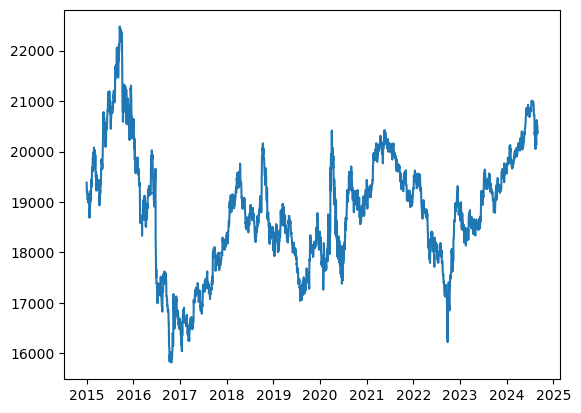

In [20]:
plt.plot(all_data.index, all_data.rupiahs_in_a_pound)



# neural network

In [118]:
X_train

,year,month,day
date,,,
2023-09-14,2023,9,14
2022-12-09,2022,12,9
2016-08-23,2016,8,23
2023-05-04,2023,5,4
2015-12-21,2015,12,21
...,...,...,...
2019-06-21,2019,6,21
2023-11-15,2023,11,15
2017-04-18,2017,4,18


In [120]:
import tensorflow as tf 
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import LSTM 
from tensorflow.keras.layers import Input

In [21]:
all_data['year'] = all_data.index.year
all_data['month'] = all_data.index.month 
all_data['day'] = all_data.index.day 

In [22]:
all_data.head()

,pounds_in_a_rupiah,rupiahs_in_a_pound,year,month,day
date,,,,,
2015-01-01,0.000052,19383.601473,2015,1,1
2015-01-02,0.000052,19208.605455,2015,1,2
2015-01-03,0.000052,19182.812200,2015,1,3
2015-01-05,0.000052,19230.769231,2015,1,5
2015-01-06,0.000052,19168.104274,2015,1,6


<Axes: xlabel='date', ylabel='rupiahs_in_a_pound'>

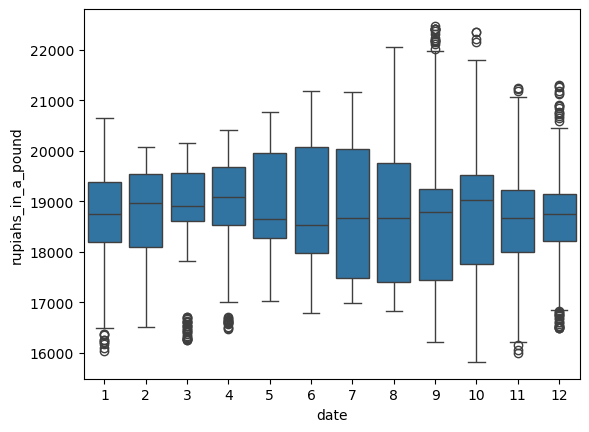

In [23]:
# Month plot 

sns.boxplot(x=all_data.index.month, y=all_data.rupiahs_in_a_pound)


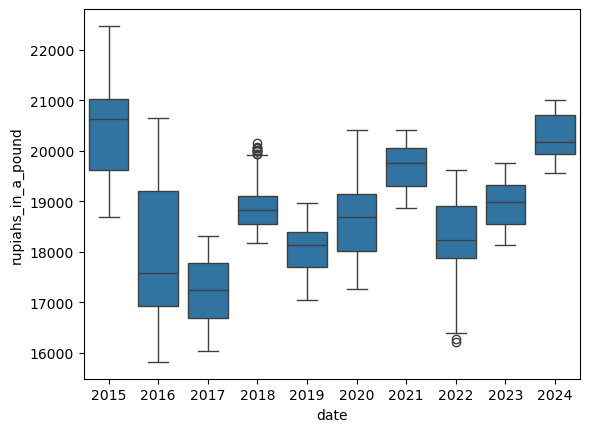

In [24]:
sns.boxplot(x=all_data.index.year, y=all_data.rupiahs_in_a_pound)
plt.show()

In [25]:
year_2015 = all_data[all_data.index.year == 2015]
year_2015

,pounds_in_a_rupiah,rupiahs_in_a_pound,year,month,day
date,,,,,
2015-01-01,0.000052,19383.601473,2015,1,1
2015-01-02,0.000052,19208.605455,2015,1,2
2015-01-03,0.000052,19182.812200,2015,1,3
2015-01-05,0.000052,19230.769231,2015,1,5
2015-01-06,0.000052,19168.104274,2015,1,6
...,...,...,...,...,...
2015-12-27,0.000049,20333.468890,2015,12,27
2015-12-28,0.000049,20345.879959,2015,12,28
2015-12-29,0.000049,20449.897751,2015,12,29


<Axes: xlabel='date', ylabel='rupiahs_in_a_pound'>

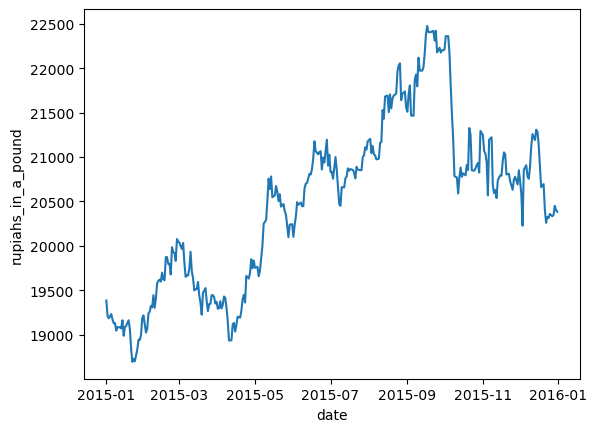

In [26]:
sns.lineplot(x=year_2015.index, y=year_2015.rupiahs_in_a_pound)

<Axes: xlabel='date', ylabel='rupiahs_in_a_pound'>

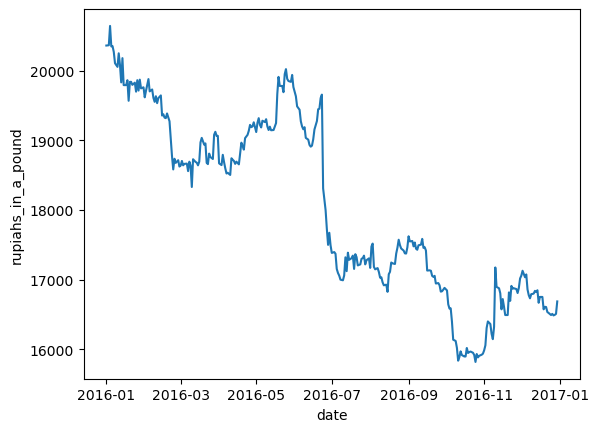

In [27]:
year_2016 = all_data[all_data.index.year == 2016]
sns.lineplot(x=year_2016.index, y=year_2016.rupiahs_in_a_pound)

<Axes: xlabel='rupiahs_in_a_pound', ylabel='Density'>

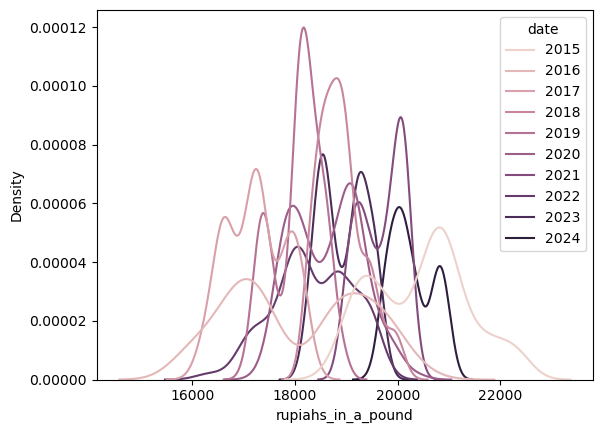

In [28]:
sns.kdeplot(x=all_data.rupiahs_in_a_pound, hue=all_data.index.year)

<Axes: xlabel='rupiahs_in_a_pound', ylabel='Density'>

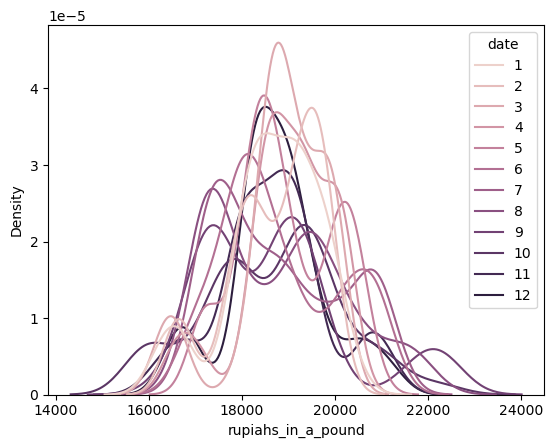

In [29]:
sns.kdeplot(x=all_data.rupiahs_in_a_pound, hue=all_data.index.month)

# Model

In [30]:
from sklearn.model_selection import train_test_split 


In [31]:
X = all_data[['year', 'month', 'day']]
y = all_data.rupiahs_in_a_pound.values.reshape(-1,1)

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2) 


In [32]:
X_train

,year,month,day
date,,,
2023-09-14,2023,9,14
2022-12-09,2022,12,9
2016-08-23,2016,8,23
2023-05-04,2023,5,4
2015-12-21,2015,12,21
...,...,...,...
2019-06-21,2019,6,21
2023-11-15,2023,11,15
2017-04-18,2017,4,18


In [125]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, SimpleRNN
from tensorflow.keras.metrics import MeanSquaredError


In [34]:
all_data.head()

,pounds_in_a_rupiah,rupiahs_in_a_pound,year,month,day
date,,,,,
2015-01-01,0.000052,19383.601473,2015,1,1
2015-01-02,0.000052,19208.605455,2015,1,2
2015-01-03,0.000052,19182.812200,2015,1,3
2015-01-05,0.000052,19230.769231,2015,1,5
2015-01-06,0.000052,19168.104274,2015,1,6


# Attempting scalecast

In [35]:
from scalecast.Forecaster import Forecaster
f = Forecaster(
   y=all_data['rupiahs_in_a_pound'],
   current_dates=all_data.index,
   # defaults below
   require_future_dates=True,
   future_dates=None,
   test_length = 0,
   cis = False,
   metrics = ['rmse','mape','mae','r2'],
)

/opt/miniconda3/envs/news_project/lib/python3.11/site-packages/dask/dataframe/__init__.py:49: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


<Axes: xlabel='Date', ylabel='Values'>

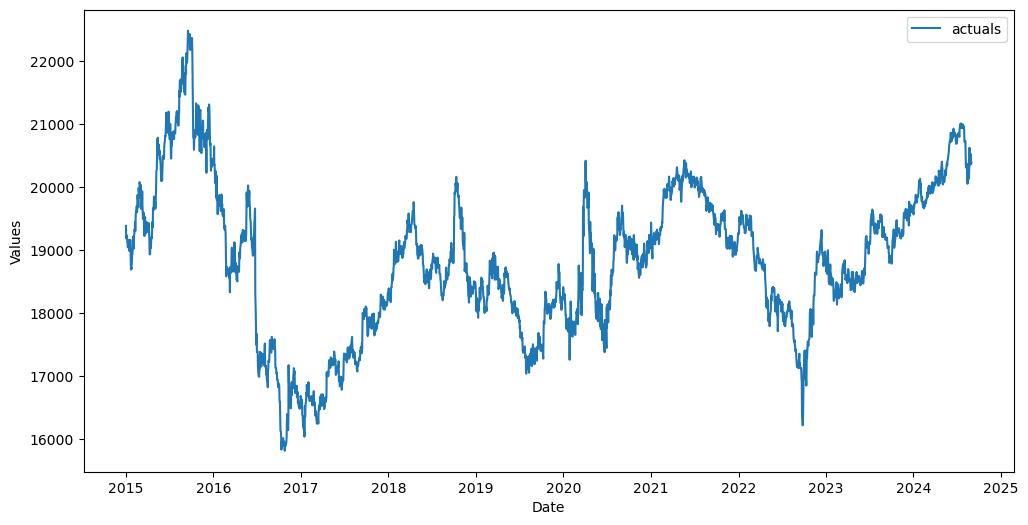

In [36]:
# test 

f.plot() 

In [143]:
all_data

,pounds_in_a_rupiah,rupiahs_in_a_pound,year,month,day
date,,,,,
2015-01-01,0.000052,19383.601473,2015,1,1
2015-01-02,0.000052,19208.605455,2015,1,2
2015-01-03,0.000052,19182.812200,2015,1,3
2015-01-05,0.000052,19230.769231,2015,1,5
2015-01-06,0.000052,19168.104274,2015,1,6
...,...,...,...,...,...
2024-08-26,0.000049,20416.496529,2024,8,26
2024-08-27,0.000049,20525.451560,2024,8,27
2024-08-28,0.000049,20379.050336,2024,8,28


In [144]:
# 
stats.kruskal(all_data['rupiahs_in_a_pound'])

ValueError: Need at least two groups in stats.kruskal()

## ACF plot 
Autocorrelation function plot 


## PACF plot 
Partial-autocorrelation Function (PACF) Plot, and Seasonal Decomposition Plot

## Findings 

> These show that there is a high amount of correlation between present and past values, otherwise known as autocorrelation, up to 25 periods. The first plot is a simple examination of this correlation; the second plot controls for correlation between terms.

> When such a pattern emerges, it is a strong indicator that the series is not stationary (its mean does not remain constant), which makes it difficult to forecast because it partly follows a “random walk” pattern, moving up and down seemingly at random. One way around this is to transform the data so that each value is the difference of the previous and current value in the series. Let’s view the ACF and PACF plots, this time using diffy=True to pass differenced data to the functions.

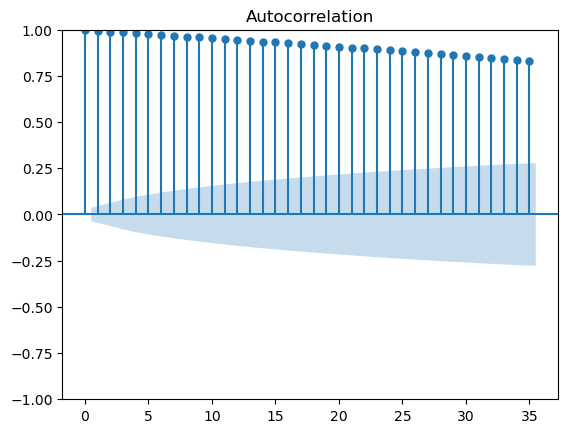

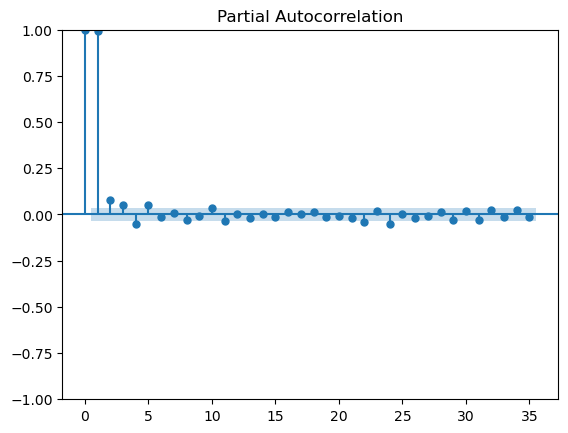

In [37]:
f.plot_acf()
f.plot_pacf()
plt.show()

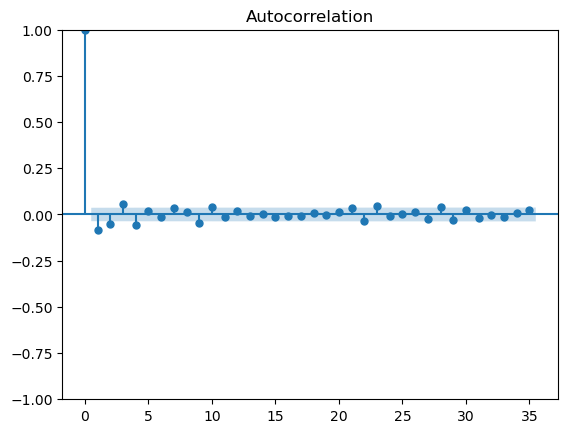

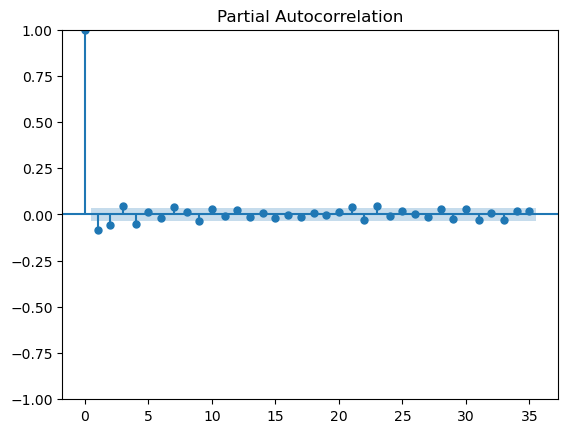

In [38]:
f.plot_acf(diffy=True)
f.plot_pacf(diffy=True)
plt.show()

It is important to hold out a chunk of the dataset to test the accuracy of the final forecasts. Let’s use 12 months to do so. We also want to forecast 24 months into the future.

In [39]:
f.set_test_length(12)




f.generate_future_dates(365)

Let’s decide what regressors to add to the Forecaster object. From the ACF plot, we can see there is significant correlation between present and future values back for several periods; let’s use 4 past values (otherwise known as lags or autoregressive terms) for now. We can also capture some seasonality with the 12th and 24th lags.



In [40]:
f.add_ar_terms(4) # 4 AR terms
f.add_AR_terms((2,12)) # 2 seasonal AR terms

The diff() method will difference all autoregressive terms (which it recognizes as the variables that begin with the “AR” label) in addition to the main series. That being said, let’s now add regressors that capture the effects of month and year.

In [41]:
f.add_seasonal_regressors('month',raw=False,sincos=True)
f.add_seasonal_regressors('year')

In [42]:
f.add_covid19_regressor() # called 'COVID19' by default
f.add_time_trend() # called 't' by default
f.add_combo_regressors('t','COVID19') # 't_COVID19'
f.add_poly_terms('t',pwr=3) # 't^2' and 't^3'

In [146]:
all_data.shape

(2912, 5)

In [43]:
import prophet

In [133]:

f.set_validation_length(6)
# automatically tune and forecast with a series of models
models = ('mlr','knn','svr','xgboost','gbt','elasticnet','mlp','prophet')
for m in models:
 f.set_estimator(m)
 f.tune() # by default, will pull grids from Grids.py
 f.auto_forecast()
 f.set_estimator('combo')
f.manual_forecast(how='simple',models='top_3',determine_best_by='ValidationMetricValue',call_me='avg')
f.manual_forecast(how='weighted',models=models,determine_best_by='ValidationMetricValue',call_me='weighted')


03:42:42 - cmdstanpy - INFO - Chain [1] start processing
03:42:43 - cmdstanpy - INFO - Chain [1] done processing
03:42:43 - cmdstanpy - INFO - Chain [1] start processing
03:42:43 - cmdstanpy - INFO - Chain [1] done processing
03:42:43 - cmdstanpy - INFO - Chain [1] start processing
03:42:43 - cmdstanpy - INFO - Chain [1] done processing
03:42:43 - cmdstanpy - INFO - Chain [1] start processing
03:42:43 - cmdstanpy - INFO - Chain [1] done processing
03:42:43 - cmdstanpy - INFO - Chain [1] start processing
03:42:43 - cmdstanpy - INFO - Chain [1] done processing
03:42:43 - cmdstanpy - INFO - Chain [1] start processing
03:42:43 - cmdstanpy - INFO - Chain [1] done processing
03:42:43 - cmdstanpy - INFO - Chain [1] start processing
03:42:43 - cmdstanpy - INFO - Chain [1] done processing


We run the following code to specify a 6-period validation set and tune 8 different models:

In [137]:
f.set_estimator('lstm')
f.manual_forecast(
    call_me='lstm_model',
    epochs=30,
    loss='mse',
    learning_rate=0.01,
    optimizer='Adam',
    lstm_layer_sizes=[64]
)



Epoch 1/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0544
Epoch 2/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0019
Epoch 3/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0019
Epoch 4/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0020
Epoch 5/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0019
Epoch 6/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0019
Epoch 7/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0019
Epoch 8/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0018
Epoch 9/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0019
Epoch 10/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0018
Epoch 11/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0020
Epoch 12/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0019
Epoch 13/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0019
Epoch 14/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0018
Epoch 15/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0021
Epoch 16/30
9

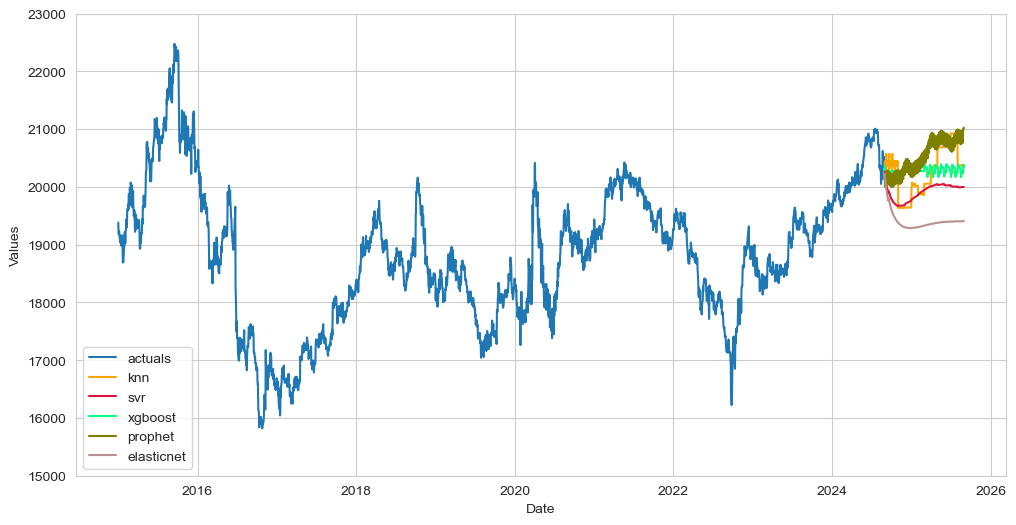

In [150]:
f.plot(models='top_5',order_by='TestSetRMSE')
plt.ylim(15000, 23000)
plt.show()

/var/folders/4y/8v3hsc192dd3bhhzh6m1dcb40000gn/T/ipykernel_14147/2561176238.py:6: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  plt.xlim(pd.to_datetime('31-08-2024'), pd.to_datetime('31-12-2024'))


(19966.0, 20088.0)

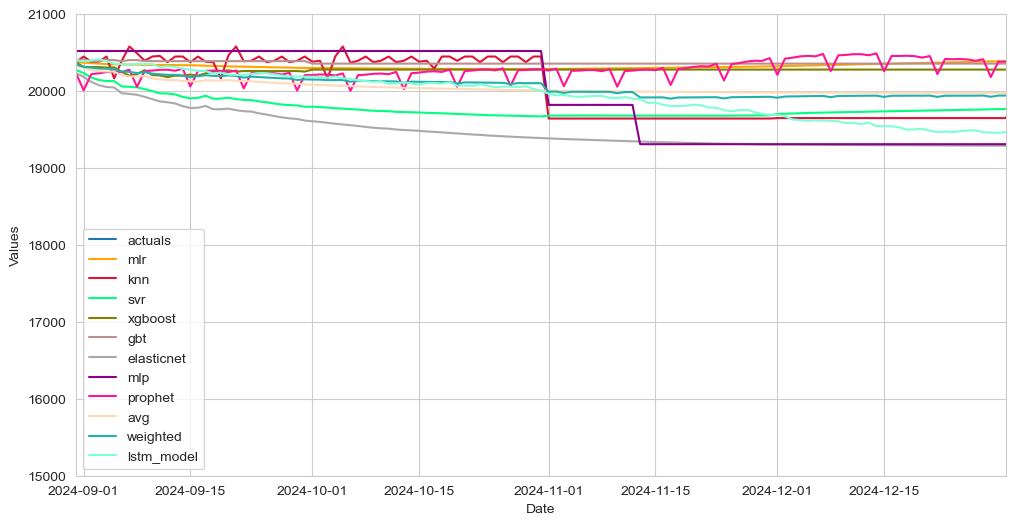

In [139]:
f.plot()

# Plotting a vertical line where the latest time period is
plt.axvline(x=max(all_data.index), c='black')
plt.ylim(15000, 21000)
plt.xlim(pd.to_datetime('31-08-2024'), pd.to_datetime('31-12-2024'))


In [48]:
%matplotlib notebook

f.plot()

# Plotting a vertical line where the latest time period is
plt.axvline(x=max(all_data.index), c='black')

plt.show()


<IPython.core.display.Javascript object>

In [49]:
all_data

,pounds_in_a_rupiah,rupiahs_in_a_pound,year,month,day
date,,,,,
2015-01-01,0.000052,19383.601473,2015,1,1
2015-01-02,0.000052,19208.605455,2015,1,2
2015-01-03,0.000052,19182.812200,2015,1,3
2015-01-05,0.000052,19230.769231,2015,1,5
2015-01-06,0.000052,19168.104274,2015,1,6
...,...,...,...,...,...
2024-08-26,0.000049,20416.496529,2024,8,26
2024-08-27,0.000049,20525.451560,2024,8,27
2024-08-28,0.000049,20379.050336,2024,8,28


In [50]:
results = f.export(['model_summaries', 'lvl_test_set_predictions', 'lvl_fcsts']) # extract results
results

{'model_summaries':    ModelNickname   Estimator  \
 0            mlr         mlr   
 1            knn         knn   
 2            svr         svr   
 3        xgboost     xgboost   
 4            gbt         gbt   
 5     elasticnet  elasticnet   
 6            mlp         mlp   
 7        prophet     prophet   
 8            avg       combo   
 9       weighted       combo   
 10    lstm_model        lstm   
 
                                                 Xvars  \
 0   [AR1, AR2, AR3, AR4, AR12, AR24, monthsin, mon...   
 1   [AR1, AR2, AR3, AR4, AR12, AR24, monthsin, mon...   
 2   [AR1, AR2, AR3, AR4, AR12, AR24, monthsin, mon...   
 3   [AR1, AR2, AR3, AR4, AR12, AR24, monthsin, mon...   
 4   [AR1, AR2, AR3, AR4, AR12, AR24, monthsin, mon...   
 5   [AR1, AR2, AR3, AR4, AR12, AR24, monthsin, mon...   
 6   [AR1, AR2, AR3, AR4, AR12, AR24, monthsin, mon...   
 7                                                  []   
 8                                                None   
 9 

In [51]:
mlr = f.export_fitted_vals(
    model="mlr"
)
mlr

,DATE,Actuals,FittedVals,Residuals
0,2015-01-29,18996.960486,18954.131722,42.828764
1,2015-01-30,19186.492709,19013.064231,173.428478
2,2015-01-31,19215.987702,19181.411729,34.575973
3,2015-02-02,19022.256040,19220.559473,-198.303433
4,2015-02-03,19065.776930,19061.932846,3.844085
...,...,...,...,...
2883,2024-08-26,20416.496529,20356.451253,60.045276
2884,2024-08-27,20525.451560,20430.649849,94.801711
2885,2024-08-28,20379.050336,20488.723054,-109.672717
2886,2024-08-29,20362.451639,20379.210958,-16.759319


In [52]:
plt.scatter(mlr.DATE, mlr.Actuals) 
plt.scatter(mlr.DATE, mlr.FittedVals)

<IPython.core.display.Javascript object>

In [53]:
f.save_tf_model("lstm_forecaster.h5")

In [54]:
f.export(
    to_excel=True,
    excel_name='IDR_forecast.xlsx'
)


{'model_summaries':    ModelNickname   Estimator  \
 0            mlr         mlr   
 1            knn         knn   
 2            svr         svr   
 3        xgboost     xgboost   
 4            gbt         gbt   
 5     elasticnet  elasticnet   
 6            mlp         mlp   
 7        prophet     prophet   
 8            avg       combo   
 9       weighted       combo   
 10    lstm_model        lstm   
 
                                                 Xvars  \
 0   [AR1, AR2, AR3, AR4, AR12, AR24, monthsin, mon...   
 1   [AR1, AR2, AR3, AR4, AR12, AR24, monthsin, mon...   
 2   [AR1, AR2, AR3, AR4, AR12, AR24, monthsin, mon...   
 3   [AR1, AR2, AR3, AR4, AR12, AR24, monthsin, mon...   
 4   [AR1, AR2, AR3, AR4, AR12, AR24, monthsin, mon...   
 5   [AR1, AR2, AR3, AR4, AR12, AR24, monthsin, mon...   
 6   [AR1, AR2, AR3, AR4, AR12, AR24, monthsin, mon...   
 7                                                  []   
 8                                                None   
 9 

In [55]:
# Saving the forecaster object 


import joblib 


joblib.dump(f, "forecaster.joblib")

['forecaster.joblib']

In [56]:
import pickle
with open("forecaster.pkl", "wb") as file: 
    
    pickle.dump(f, file)


In [57]:
with open('forecaster.pkl', 'rb') as file: 
    z = pickle.load(file)

/opt/miniconda3/envs/news_project/lib/python3.11/site-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 7 variables whereas the saved optimizer has 12 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [58]:
joblib.load('forecaster.pkl')

/opt/miniconda3/envs/news_project/lib/python3.11/site-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 7 variables whereas the saved optimizer has 12 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Forecaster(
    DateStartActuals=2015-01-01T00:00:00.000000000
    DateEndActuals=2024-08-30T00:00:00.000000000
    Freq=None
    N_actuals=2912
    ForecastLength=365
    Xvars=['AR1', 'AR2', 'AR3', 'AR4', 'AR12', 'AR24', 'monthsin', 'monthcos', 'year', 'COVID19', 't', 't_COVID19', 't^2', 't^3']
    TestLength=12
    ValidationMetric=rmse
    ForecastsEvaluated=['mlr', 'knn', 'svr', 'xgboost', 'gbt', 'elasticnet', 'mlp', 'prophet', 'avg', 'weighted', 'lstm_model']
    CILevel=None
    CurrentEstimator=lstm
    GridsFile=Grids
)

# Creating the ARIMA model

In [59]:
# Creating a pandas series object 

data = pd.Series(all_data['rupiahs_in_a_pound'])

data

date
2015-01-01    19383.601473
2015-01-02    19208.605455
2015-01-03    19182.812200
2015-01-05    19230.769231
2015-01-06    19168.104274
                  ...     
2024-08-26    20416.496529
2024-08-27    20525.451560
2024-08-28    20379.050336
2024-08-29    20362.451639
2024-08-30    20391.517129
Name: rupiahs_in_a_pound, Length: 2912, dtype: float64

In [60]:
type(data.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [61]:
# Dickey fullter test 


from statsmodels.tsa.stattools import adfuller




In [62]:
adfuller(data)

## The p value comes second 
# p = 0.147151, so there is non-stationarity

(-2.359141925255516,
 0.15360180579035204,
 10,
 2901,
 {'1%': -3.432606151575025,
  '5%': -2.8625368163579603,
  '10%': -2.567300633673491},
 35896.19216187106)

In [63]:
from statsmodels.tsa.arima.model import ARIMA 

In [64]:
# Parameters are p, d, q

model = ARIMA(data, order=(3, 2, 1))

model_fitted = model.fit()

/opt/miniconda3/envs/news_project/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/miniconda3/envs/news_project/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/miniconda3/envs/news_project/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [65]:
model.param_terms

['ar', 'ma', 'variance']

In [66]:
model.data

In [67]:


plt.plot(data, color='blue')

plt.plot(model_fitted.fittedvalues, color='r')
plt.yscale("log")
plt.legend(['actual', 'arima'])

<IPython.core.display.Javascript object>

In [68]:
model_fitted.fittedvalues == all_data.rupiahs_in_a_pound

date
2015-01-01    False
2015-01-02    False
2015-01-03    False
2015-01-05    False
2015-01-06    False
              ...  
2024-08-26    False
2024-08-27    False
2024-08-28    False
2024-08-29    False
2024-08-30    False
Length: 2912, dtype: bool

In [69]:
fig, axes = plt.subplots(1, 2) 

sns.lineplot(x=all_data.index, y=all_data.rupiahs_in_a_pound, ax=axes[0])

sns.lineplot(x=all_data.index, y=model_fitted.fittedvalues, ax=axes[1])

<IPython.core.display.Javascript object>

<Axes: xlabel='date', ylabel='None'>

In [70]:
max(all_data.index)

Timestamp('2024-08-30 00:00:00')

In [71]:
# Prediction 

predictions = model_fitted.predict(start='2024-08-7', end='2024-08-9')

In [72]:
all_data.tail()

,pounds_in_a_rupiah,rupiahs_in_a_pound,year,month,day
date,,,,,
2024-08-26,0.000049,20416.496529,2024,8,26
2024-08-27,0.000049,20525.451560,2024,8,27
2024-08-28,0.000049,20379.050336,2024,8,28
2024-08-29,0.000049,20362.451639,2024,8,29
2024-08-30,0.000049,20391.517129,2024,8,30


In [73]:
predictions

date
2024-08-07    20549.833117
2024-08-08    20369.781050
2024-08-09    20373.264492
Name: predicted_mean, dtype: float64

In [74]:
## arima metrics 


sns.kdeplot(x=model_fitted.resid)
plt.xlabel("residuals") 
plt.title(f"density plot of residuals. mean={np.mean(model_fitted.resid)}, std={np.std(model_fitted.resid)}") 
plt.show()

<IPython.core.display.Javascript object>

In [75]:
sns.boxplot(model_fitted.resid)

plt.show()

<IPython.core.display.Javascript object>

In [76]:
sns.stripplot(x=model_fitted.resid)


<IPython.core.display.Javascript object>

<Axes: xlabel='None'>

In [77]:
model_fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:     rupiahs_in_a_pound   No. Observations:                 2912
Model:                 ARIMA(3, 2, 1)   Log Likelihood              -18117.239
Date:                Mon, 02 Sep 2024   AIC                          36244.478
Time:                        14:16:14   BIC                          36274.357
Sample:                             0   HQIC                         36255.242
                               - 2912                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0863      0.012     -6.999      0.000      -0.110      -0.062
ar.L2         -0.0519      0.014     -3.785      0.000      -0.079      -0.025
ar.L3          0.0472      0.014      3.462      0.001       0.020       0.074
ma.L1         -0.9999      0.025    -40.157      0.000      -1.049      -0.951
sigma2       1.49e+04    375.648     39.671      0.000    1.42e+04    1.56e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             17296.66
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               0.54   Skew:                             0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [78]:
data.index

DatetimeIndex(['2015-01-01', '2015-01-02', '2015-01-03', '2015-01-05',
               '2015-01-06', '2015-01-07', '2015-01-08', '2015-01-09',
               '2015-01-10', '2015-01-12',
               ...
               '2024-08-19', '2024-08-20', '2024-08-21', '2024-08-22',
               '2024-08-23', '2024-08-26', '2024-08-27', '2024-08-28',
               '2024-08-29', '2024-08-30'],
              dtype='datetime64[ns]', name='date', length=2912, freq=None)

In [79]:
all_data.tail()

,pounds_in_a_rupiah,rupiahs_in_a_pound,year,month,day
date,,,,,
2024-08-26,0.000049,20416.496529,2024,8,26
2024-08-27,0.000049,20525.451560,2024,8,27
2024-08-28,0.000049,20379.050336,2024,8,28
2024-08-29,0.000049,20362.451639,2024,8,29
2024-08-30,0.000049,20391.517129,2024,8,30


In [80]:
# forecast

forecast_values = model_fitted.forecast(steps=7)
forecast_df = pd.Series(forecast_values)

/opt/miniconda3/envs/news_project/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/miniconda3/envs/news_project/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [81]:
future_dates = pd.date_range("2024-08-10", '2024-08-16', freq="D")

future_dates = pd.to_datetime(future_dates)
forecast_df.index = future_dates

In [82]:
forecast_df = pd.DataFrame(forecast_df)
forecast_df.rename({"predicted_mean": "rupiahs_in_a_pound"}, axis=1, inplace=True)


In [83]:
forecast_df.head()

,rupiahs_in_a_pound
2024-08-10,20383.455249
2024-08-11,20382.347449
2024-08-12,20384.721105
2024-08-13,20384.682270
2024-08-14,20384.998785


In [84]:
## PLotting the forecast 

sns.lineplot(x=all_data.index, y=all_data.rupiahs_in_a_pound)
sns.lineplot(x=forecast_df.index, y=forecast_df.rupiahs_in_a_pound, color='r')
plt.legend(['current', 'forecast'])

<IPython.core.display.Javascript object>

In [85]:
sns.set_style("whitegrid")
forecast_df.plot(kind='line')
plt.yscale("log")

<IPython.core.display.Javascript object>

# Using the AUTO-ARIMA Model

In [86]:
from pmdarima import auto_arima 

In [102]:
# checking the stationarity 

from statsmodels.graphics.tsaplots import plot_acf 
from statsmodels.graphics.tsaplots import plot_pacf 


<IPython.core.display.Javascript object>

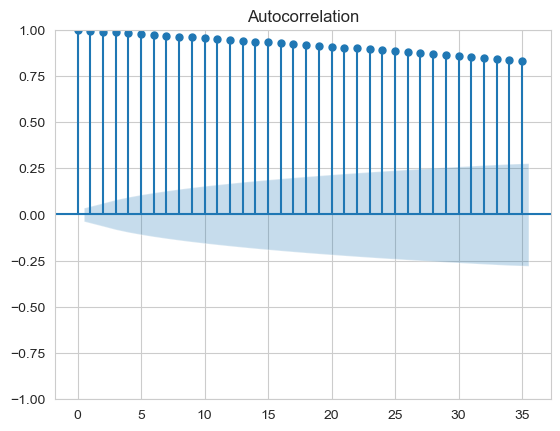

In [104]:
plot_acf(all_data.rupiahs_in_a_pound)

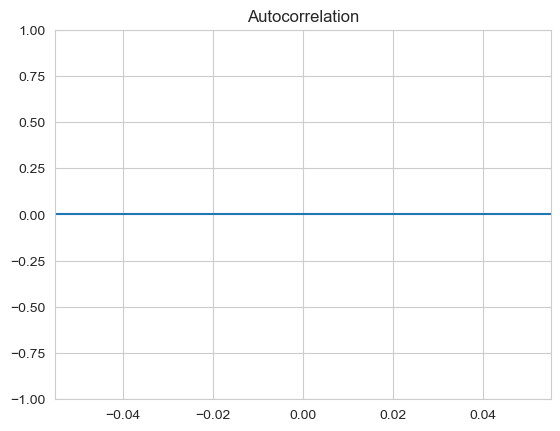

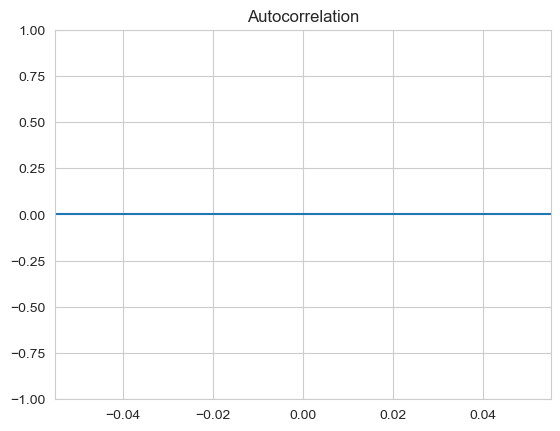

In [114]:
plot_acf(all_data.rupiahs_in_a_pound.diff())

<IPython.core.display.Javascript object>

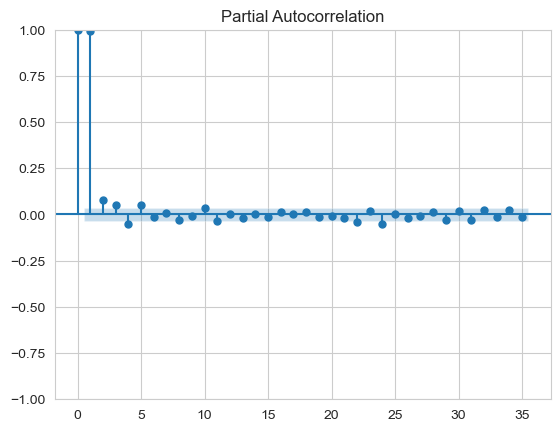

In [106]:
plot_pacf(all_data.rupiahs_in_a_pound)

In [87]:
autoarima_model = auto_arima(data, suppress_warnings=True, seasonal=False, trace=True)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=36241.843, Time=0.53 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=36279.739, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=36259.915, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=36257.581, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=36277.762, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=36243.992, Time=0.24 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=36241.618, Time=0.23 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=36256.793, Time=0.18 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=36252.514, Time=0.08 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=36242.566, Time=0.49 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=36248.093, Time=0.09 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=36245.477, Time=0.29 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=36239.646, Time=0.13 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=36254.813, Time=0.10 sec
 ARIMA(2,1,0)(0,0,0

In [88]:
autoarima_model_fitted = autoarima_model.fit(data)

In [89]:
new_model = ARIMA(data, order=(2, 1, 3)) 
new_model_fitted = new_model.fit() 


/opt/miniconda3/envs/news_project/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/miniconda3/envs/news_project/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/miniconda3/envs/news_project/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


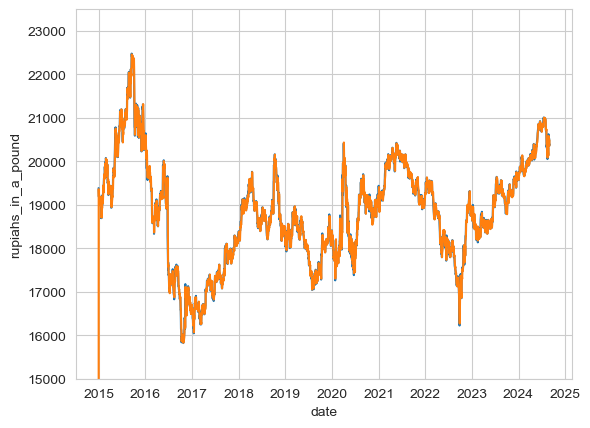

In [111]:
## Visualising this 
%matplotlib inline
sns.lineplot(x=all_data.index, y=all_data.rupiahs_in_a_pound) 
sns.lineplot(x=all_data.index, y=new_model_fitted.fittedvalues)

## setting the y limits to better visualise the data 

plt.ylim(15000, 23500)

plt.show()

In [91]:
plt.hist(new_model_fitted.resid, bins=30)
plt.ylabel("Frequency")
plt.xlabel("Residuals") 

plt.xscale("log") 
plt.show()

<IPython.core.display.Javascript object>

In [92]:
# Residuals 

sns.kdeplot(x=new_model_fitted.resid)
plt.title(f"Residuals: Mean={np.mean(new_model_fitted.resid)}, std={np.std(new_model_fitted.resid)}")
plt.xscale("log")
plt.show()

<IPython.core.display.Javascript object>

In [93]:
sns.boxplot(y=new_model_fitted.resid)
plt.yscale("log")
plt.show()

<IPython.core.display.Javascript object>

In [94]:
autoarima_model.fittedvalues

<bound method ARIMA.fittedvalues of ARIMA(order=(2, 1, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)>

In [95]:
# The first value is set to 

new_model_fitted.fittedvalues

date
2015-01-01        0.000000
2015-01-02    19358.336541
2015-01-03    19209.630502
2015-01-05    19204.889976
2015-01-06    19209.837638
                  ...     
2024-08-26    20363.601032
2024-08-27    20431.608246
2024-08-28    20494.972125
2024-08-29    20404.830435
2024-08-30    20359.028228
Length: 2912, dtype: float64

In [96]:
np.shape(
new_model_fitted.fittedvalues)

(2912,)

In [97]:
new_model_fitted.forecast(10)

/opt/miniconda3/envs/news_project/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/miniconda3/envs/news_project/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


2912    20392.339554
2913    20392.664589
2914    20387.685679
2915    20396.279826
2916    20385.519104
2917    20396.816374
2918    20386.558467
2919    20394.465000
2920    20389.800344
2921    20390.842220
Name: predicted_mean, dtype: float64

In [98]:
## Plotting the forecast
# I need to convert the index to datetime
all_data.head()

,pounds_in_a_rupiah,rupiahs_in_a_pound,year,month,day
date,,,,,
2015-01-01,0.000052,19383.601473,2015,1,1
2015-01-02,0.000052,19208.605455,2015,1,2
2015-01-03,0.000052,19182.812200,2015,1,3
2015-01-05,0.000052,19230.769231,2015,1,5
2015-01-06,0.000052,19168.104274,2015,1,6


In [99]:
all_data.index.max()

Timestamp('2024-08-30 00:00:00')

In [100]:
pd.date_range(start='2024-08-31', periods=10)

DatetimeIndex(['2024-08-31', '2024-09-01', '2024-09-02', '2024-09-03',
               '2024-09-04', '2024-09-05', '2024-09-06', '2024-09-07',
               '2024-09-08', '2024-09-09'],
              dtype='datetime64[ns]', freq='D')

/opt/miniconda3/envs/news_project/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/miniconda3/envs/news_project/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


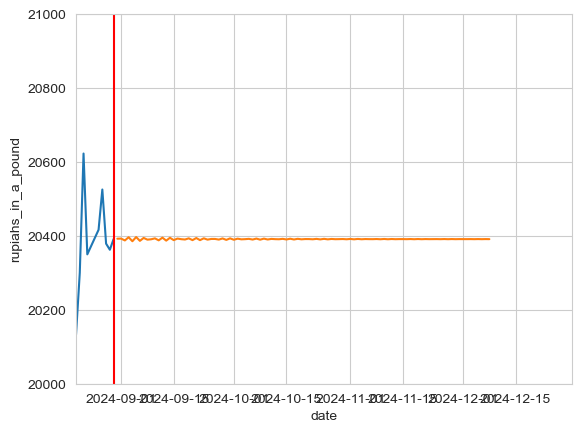

In [113]:
sns.lineplot(y='rupiahs_in_a_pound', x=all_data.index, data=all_data)
plt.axvline(x=all_data.index.max(), color='red')
plt.plot( pd.date_range(start='2024-08-31', periods=100), new_model_fitted.forecast(100))

# setting the x axis limits
plt.xlim(pd.to_datetime('2024-08-20'), pd.to_datetime('2024-12-30'))
## setting the y axis limits
plt.ylim(20000, 21000)
plt.show()